In [1]:
import random, math, pylab

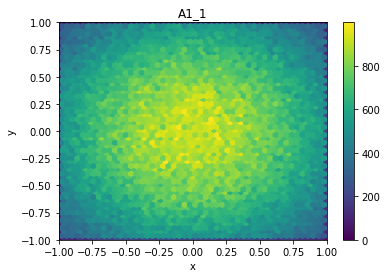

In [4]:
def gauss_cut():
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= 1.0:
            return x

alpha = -2
nsamples = 1000000
samples_x = []
samples_y = []
for sample in range(nsamples):
    while True:
        x = gauss_cut()
        y = gauss_cut()
        p = math.exp(- alpha * (x ** 4 + y ** 4)) #p(x)=exp(-0.5*x'^2)/exp(-0.5*x^2)-->p(x,y)=p(x)*p(y)
        if random.uniform(0.0, 1.0) < p:
            break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A1_1')
pylab.savefig('plot_A1_1.png')
pylab.show()

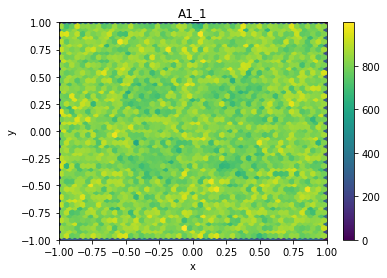

In [5]:
alpha = -2
nsamples = 1000000
samples_x = []
samples_y = []
for sample in range(nsamples):
    while True:
        x = random.uniform(-1.0, 1.0)
        y = random.uniform(-1.0, 1.0)
        p = math.exp( -0.5 * (x ** 2 + y ** 2)- alpha * (x ** 4 + y ** 4))
        if random.uniform(0.0, 1.0) < p:
            break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A1_1')
pylab.show()

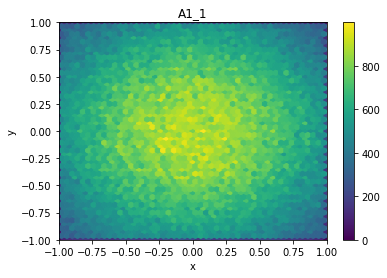

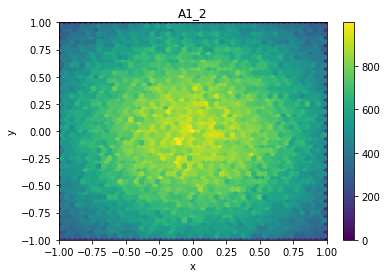

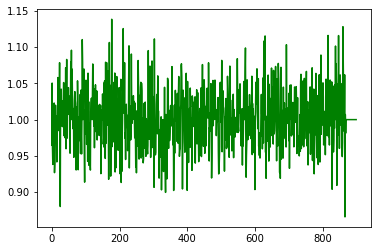

In [6]:
def gauss_cut(cut=1.0):
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= cut:
            return x

def compare(x1s,y1s,x2s,y2s,bins=(30,30),xrange=(-1,+1),yrange=(-1,1)):
    '''
    Compare samples from two 2D distribitions by generating counts for two
    histograms, then calculating and plotting ratios.
    
    Ideally we should see small random variations about unity, not
    systematic differences, as long as the two distributions are the same.
    
    Arguments:
        x1s     X coordinates of points sampled from 1st distibution
        y1s     Y coordinates of points sampled from 1st distibution
        x2s     X coordinates of points sampled from 2nd distibution
        y2s     Y coordinates of points sampled from 2nd distibution
        bins    Number of bins (X & Y) for data
        xrange  Range of x data
        yrange  Range of y data
    '''
    w,h=bins
    xmin,xmax=xrange
    ymin,ymax=yrange
    def histogram(xs,ys):
        def index (u,umin,umax,r):
            return int((r-1)*(u-umin)/(umax-umin))
        counts = [[0 for x in range(w)] for y in range(h)]
        for x,y in zip(xs,ys):
            i = index(x,xmin,xmax,w)
            j = index(y,ymin,ymax,h)
            counts[i][j]+=1
        return counts
    h1=[item for sublist in histogram(x1s,y1s) for item in sublist]
    h2=[item for sublist in histogram(x2s,y2s) for item in sublist]
    h3=[abs (a/b if b>0 else 1 if a==0 else 0) for (a,b) in zip(h1,h2)]
    iis = [i for i in range(len(h1))]
    pylab.plot(iis,h3,'g') # iis,h1,'r',iis,h2,'b',
    
alpha = -0.01
nsamples = 1000000

def evolve(proposer=lambda: random.uniform(-1.0, 1.0),
           accepter=lambda x,y: math.exp(-0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4))):
    '''
    Perform direct sampling Monte Carlo evolution
    
    Arguments:
        proposer   Function which proposes data to be used for the next step
        accepter   Function which decides whether to accept proposed value
    '''    
    samples_x = []
    samples_y = []
    for sample in range(nsamples):
        while True:
            x = proposer()
            y = proposer()
            p = accepter(x,y)
            if random.uniform(0.0, 1.0) < p:
                break
        samples_x.append(x)
        samples_y.append(y)
    return (samples_x, samples_y)

def plot(name,samples_x, samples_y):
    pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
    pylab.axis([-1.0, 1.0, -1.0, 1.0])
    cb = pylab.colorbar()
    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.title(name)


    
# Evolve and plot with uniform distribution

pylab.figure(1)    
(x1s, y1s)=evolve()
plot('A1_1',x1s, y1s)

# Evolve and plot with gauss_cut

pylab.figure(2) 
(x2s, y2s)=evolve(proposer=gauss_cut, 
                              accepter=lambda x,y: math.exp(- alpha * (x ** 4 + y ** 4)))
plot('A1_2',x2s, y2s)

pylab.figure(3) 

compare(x1s,y1s,x2s,y2s)

pylab.show()

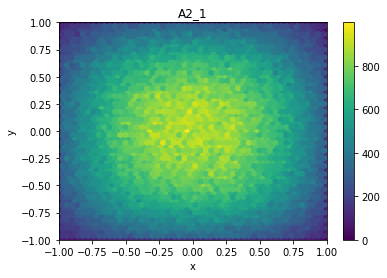

In [7]:
alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    if step % 2 == 0:
        while True:
            x = random.uniform(-1.0, 1.0)
            p = math.exp(-0.5 * x ** 2 - alpha * x ** 4 )
            if random.uniform(0.0, 1.0) < p:
                break
    else:
        while True:
            y = random.uniform(-1.0, 1.0)
            p = math.exp(-0.5 * y ** 2 - alpha * y ** 4 )
            if random.uniform(0.0, 1.0) < p:
                break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A2_1')
pylab.savefig('plot_A2_1.png')
pylab.show()

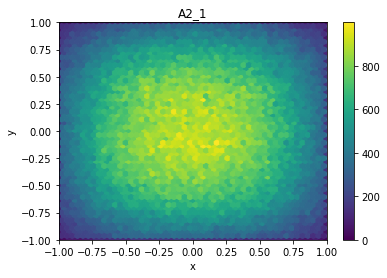

In [8]:
def gauss_cut():
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= 1.0:
            return x

alpha = 0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    if step % 2 == 0:
        while True:
            x = gauss_cut()
            p = math.exp(- alpha * x ** 4 )
            if random.uniform(0.0, 1.0) < p:
                break
    else:
        while True:
            y = gauss_cut()
            p = math.exp(- alpha * y ** 4 )
            if random.uniform(0.0, 1.0) < p:
                break
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A2_1')
pylab.savefig('plot_A2_1.png')
pylab.show()

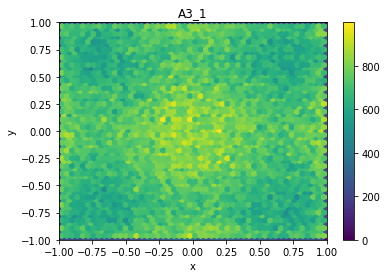

In [9]:
alpha = -0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    xnew = random.uniform(-1.0, 1.0)
    ynew = random.uniform(-1.0, 1.0)
    exp_new = - 0.5 * (xnew ** 2 + ynew ** 2) - alpha * (xnew ** 4 + ynew ** 4)
    exp_old = - 0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4)
    if random.uniform(0.0, 1.0) < math.exp(exp_new - exp_old):
        x = xnew
        y = ynew
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A3_1')
pylab.savefig('plot_A3_1.png')
pylab.show()

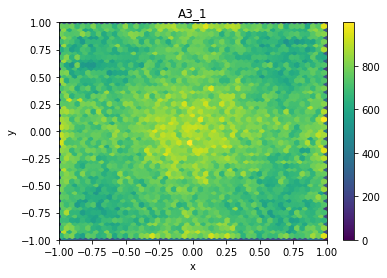

In [10]:
def gauss_cut():
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= 1.0:
            return x

alpha = -0.5
nsteps = 1000000
samples_x = []
samples_y = []
x, y = 0.0, 0.0
for step in range(nsteps):
    xnew = gauss_cut()
    ynew = gauss_cut()
    exp_new = - alpha * (xnew ** 4 + ynew ** 4)
    exp_old = - alpha * (x ** 4 + y ** 4)
    if random.uniform(0.0, 1.0) < math.exp(exp_new - exp_old):
        x = xnew
        y = ynew
    samples_x.append(x)
    samples_y.append(y)

pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
pylab.axis([-1.0, 1.0, -1.0, 1.0])
cb = pylab.colorbar()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('A3_1')
pylab.savefig('plot_A3_1.png')
pylab.show()

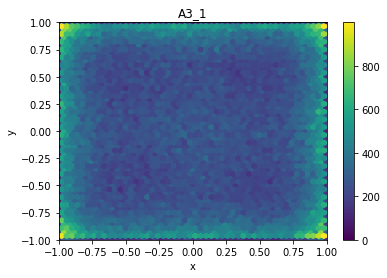

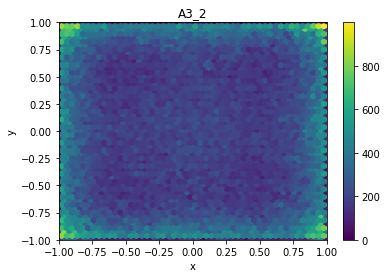

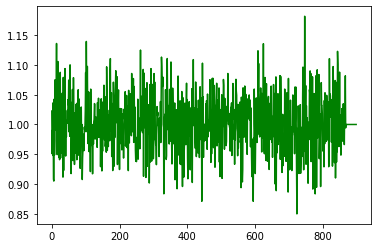

In [11]:
def gauss_cut(cut=1.0):
    while True:
        x = random.gauss(0.0, 1.0)
        if abs(x) <= cut:
            return x

def compare(x1s,y1s,x2s,y2s,bins=(30,30),xrange=(-1,+1),yrange=(-1,1)):
    '''
    Compare samples from two 2D distribitions by generating counts for two
    histograms, then calculating and plotting ratios.
    
    Ideally we should see small random variations about unity, not
    systematic differences, as long as the two distributions are the same.
    
    Arguments:
        x1s     X coordinates of points sampled from 1st distibution
        y1s     Y coordinates of points sampled from 1st distibution
        x2s     X coordinates of points sampled from 2nd distibution
        y2s     Y coordinates of points sampled from 2nd distibution
        bins    Number of bins (X & Y) for data
        xrange  Range of x data
        yrange  Range of y data
    '''
    w,h=bins
    xmin,xmax=xrange
    ymin,ymax=yrange
    def histogram(xs,ys):
        def index (u,umin,umax,r):
            return int((r-1)*(u-umin)/(umax-umin))
        counts = [[0 for x in range(w)] for y in range(h)]
        for x,y in zip(xs,ys):
            i = index(x,xmin,xmax,w)
            j = index(y,ymin,ymax,h)
            counts[i][j]+=1
        return counts
    h1=[item for sublist in histogram(x1s,y1s) for item in sublist]
    h2=[item for sublist in histogram(x2s,y2s) for item in sublist]
    h3=[abs (a/b if b>0 else 1 if a==0 else 0) for (a,b) in zip(h1,h2)]
    iis = [i for i in range(len(h1))]
    pylab.plot(iis,h3,'g') # iis,h1,'r',iis,h2,'b',
    
alpha = -1
nsteps = 1000000

def evolve(proposer=lambda: random.uniform(-1.0, 1.0),
          accepter=lambda x,y: (-0.5 * (x ** 2 + y ** 2) - alpha * (x ** 4 + y ** 4)),
          balance= lambda exp_new,exp_old: math.exp(exp_new - exp_old)):
    samples_x = []
    samples_y = []
    x, y = 0.0, 0.0
    for step in range(nsteps):
        xnew = proposer()
        ynew = proposer()
        exp_new = accepter(xnew,ynew)
        exp_old = accepter(x,y)
        if random.uniform(0.0, 1.0) < balance(exp_new,exp_old):
            x = xnew
            y = ynew
        samples_x.append(x)
        samples_y.append(y)
    return (samples_x, samples_y)

def plot(name,samples_x, samples_y):
    pylab.hexbin(samples_x, samples_y, gridsize=50, bins=1000)
    pylab.axis([-1.0, 1.0, -1.0, 1.0])
    cb = pylab.colorbar()
    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.title(name)

    
# Evolve and plot with uniform distribution

pylab.figure(1)    
(x1s, y1s)=evolve()
plot('A3_1',x1s, y1s)

# Evolve and plot with gauss_cut

pylab.figure(2) 
(x2s, y2s)=evolve(proposer=gauss_cut, 
                  accepter=lambda x,y: (- alpha * (x ** 4 + y ** 4)))
plot('A3_2',x2s, y2s)

pylab.figure(3)
compare(x1s,y1s,x2s,y2s)

pylab.show()

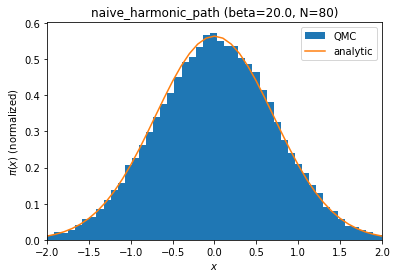

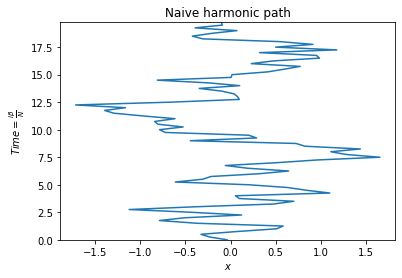

In [12]:
def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 4000000
x = [5.0] * N
data = []
for step in range(n_steps):
    k = random.randint(0, N - 1)
    knext, kprev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-delta, delta)
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])
        
with open('xconfiguration_b1_beta%s.txt' % beta,'w') as f:
        for xx in x:
            f.write('{0}\n'.format(xx))

pylab.figure(1)
pylab.hist(data, density=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('naive_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_B1_beta%s.png' % beta)

pylab.figure(2)
y=[i*beta/N for i in range(N)]
pylab.plot(x,y)
pylab.xlabel('$x$')
pylab.ylabel('$Time=\\frac{i \\beta}{N}$')
pylab.ylim(y[0],y[-1])
pylab.title('Naive harmonic path')
pylab.savefig('harmonic path_B1_beta%s.png' % beta)

pylab.show()

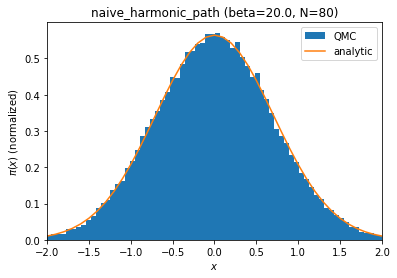

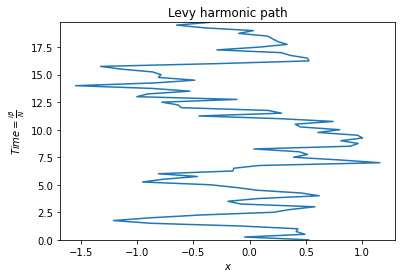

In [2]:
def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 80
Ncut=N//2
dtau = beta / N
delta = 1.0
n_steps = 4000000
x = [5.0] * N
data = []

for step in range(n_steps):
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    x = x[Ncut:] + x[:Ncut]
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])

with open('xconfiguration_b2_beta%s.txt' % beta,'w') as f:
        for xx in x:
            f.write('{0}\n'.format(xx))

pylab.figure(1)
pylab.hist(data, density=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('naive_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_B2_beta%s.png' % beta)

pylab.figure(2)
y=[i*beta/N for i in range(N)]
pylab.plot(x,y)
pylab.xlabel('$x$')
pylab.ylabel('$Time=\\frac{i \\beta}{N}$')
pylab.ylim(y[0],y[-1])
pylab.title('Levy harmonic path')
pylab.savefig('harmonic path_B2_beta%s.png' % beta)

pylab.show()

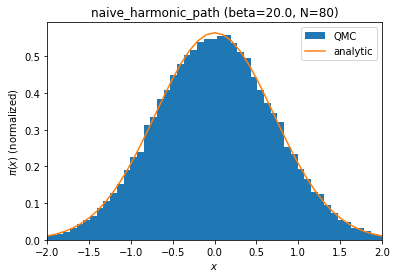

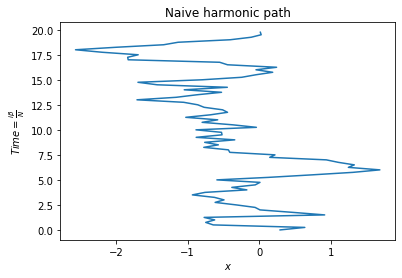

In [ ]:

'''
Path sampling: A firework of algorithms
This program is tor step B1. I have restructured into spearate functions
for the main steps.
'''

import math, random, pylab

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

beta = 20.0
N = 80
dtau = beta / N
delta = 1.0
n_steps = 4000000

def create_path():
    x = [5.0] * N
    data = []
    for step in range(n_steps):
        k = random.randint(0, N - 1)
        knext, kprev = (k + 1) % N, (k - 1) % N
        x_new = x[k] + random.uniform(-delta, delta)
        old_weight  = (rho_free(x[knext], x[k], dtau) *
                       rho_free(x[k], x[kprev], dtau) *
                       math.exp(-0.5 * dtau * x[k] ** 2))
        new_weight  = (rho_free(x[knext], x_new, dtau) *
                       rho_free(x_new, x[kprev], dtau) *
                       math.exp(-0.5 * dtau * x_new ** 2))
        if random.uniform(0.0, 1.0) < new_weight / old_weight:
            x[k] = x_new
        if step % N == 0:
            k = random.randint(0, N - 1)
            data.append(x[k])
    return (x,data)

def write_path(x):
    with open('plot_B1_beta%s.txt' % beta,'w') as f:
        for xx in x:
            f.write('{0}\n'.format(xx))
    
def plot_histogram(data,figure=1):
    pylab.figure(figure)
    pylab.hist(data, density=True, bins=100, label='QMC')
    list_x = [0.1 * a for a in range (-30, 31)]
    list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
              math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
    pylab.plot(list_x, list_y, label='analytic')
    pylab.legend()
    pylab.xlabel('$x$')
    pylab.ylabel('$\\pi(x)$ (normalized)')
    pylab.title('naive_harmonic_path (beta=%s, N=%i)' % (beta, N))
    pylab.xlim(-2, 2)


def plot_path(x,figure=1):
    pylab.figure(figure)
    y=[i*beta/N for i in range(N)]
    pylab.plot(x,y)
    pylab.xlabel('$x$')
    pylab.ylabel('$Time=\\frac{i \\beta}{N}$')
    pylab.title('Naive harmonic path')

    
x,data = create_path()
write_path(x)
plot_histogram(data)
plot_path(x,figure=2)

pylab.show()


In [ ]:
def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 80
Ncut=N//2
dtau = beta / N
delta = 1.0
n_steps = 4000000
x = [5.0] * N
sigma = 1.0 / math.sqrt( 2.0 * math.tanh( beta / 2.0))
data = []

for step in range(n_steps):
    x[0] = random.gauss(0.0, sigma)
    x = levy_harmonic_path(x[0], x[0], dtau, N)
    x = x[Ncut:] + x[:Ncut]
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])

with open('xconfiguration_b3_beta%s.txt' % beta,'w') as f:
        for xx in x:
            f.write('{0}\n'.format(xx))



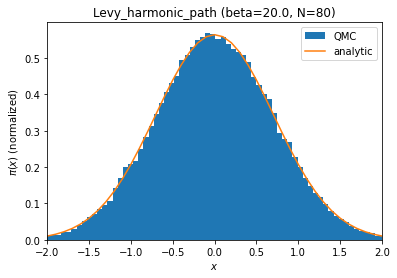

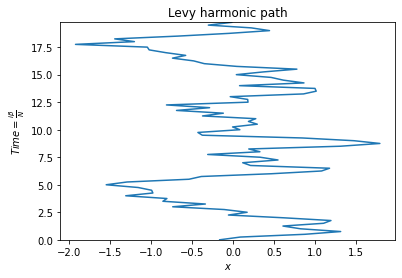

In [ ]:
pylab.figure(1)
pylab.hist(data, density=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('Levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_B3_beta%s.png' % beta)

pylab.figure(2)
y=[i*beta/N for i in range(N)]
pylab.plot(x,y)
pylab.xlabel('$x$')
pylab.ylabel('$Time=\\frac{i \\beta}{N}$')
pylab.ylim(y[0],y[-1])
pylab.title('Levy harmonic path')
pylab.savefig('harmonic path_B3_beta%s.png' % beta)

pylab.show()

In [3]:
def V(x, cubic, quartic):
    pot = x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4
    return pot

def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

def Trotter_weight(x,cubic,quartic,dtau):
    return math.exp(sum(-V(a, cubic, quartic) * dtau for a in x))

beta = 20.0
N = 80
Ncut=N//2
dtau = beta / N
delta = 1.0
n_steps = 4000000
x = [5.0] * N
sigma = 1.0 / math.sqrt( 2.0 * math.tanh( beta / 2.0))
cubic=quartic=0.0
data = []

for step in range(n_steps):
    x_new = levy_free_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:]
    weight_old= Trotter_weight(x,cubic,quartic,dtau)
    weight_new= Trotter_weight(x_new,cubic,quartic,dtau)
    if random.uniform(0.0,1.0) <= weight_new/weight_old:
        x=x_new[:]
        x = x[1:] + x[:1]
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])

with open('xconfiguration_C1_beta%s.txt' % beta,'w') as f:
        for xx in x:
            f.write('{0}\n'.format(xx))
            
pylab.figure()
pylab.hist(data, density=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('Levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_C1_beta%s.png' % beta)

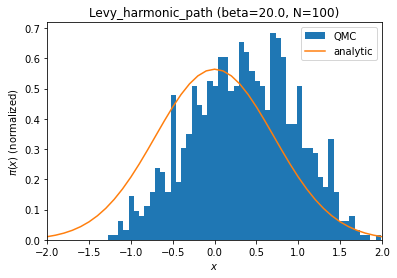

In [ ]:
def V_anharm(x, cubic, quartic):
    pot = cubic * x ** 3 + quartic * x ** 4
    return pot

def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

def Trotter_weight(x,cubic,quartic,dtau):
    return math.exp(sum(-V_anharm(a, cubic, quartic) * dtau for a in x))

beta = 20.0
N = 100
Ncut=N//2
dtau = beta / N
delta = 1.0
n_steps = 4000000
x = [5.0] * N
sigma = 1.0 / math.sqrt( 2.0 * math.tanh( beta / 2.0))
quartic=1.0
cubic=-quartic
data = []

for step in range(n_steps):
    x_new = levy_free_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:]
    weight_old= Trotter_weight(x,cubic,quartic,dtau)
    weight_new= Trotter_weight(x_new,cubic,quartic,dtau)
    if weight_old==0 or random.uniform(0.0,1.0) < weight_new/weight_old:
        x=x_new[:]
        x = x[1:] + x[:1]
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])

with open('xconfiguration_C2_beta%s.txt' % beta,'w') as f:
        for xx in x:
            f.write('{0}\n'.format(xx))
            
pylab.figure()
pylab.hist(data, density=True, bins=100, label='QMC')
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) * \
          math.exp(-x ** 2 * math.tanh(beta / 2.0)) for x in list_x]
pylab.plot(list_x, list_y, label='analytic')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('Levy_harmonic_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
pylab.savefig('plot_C2_beta%s.png' % beta)